# Section 2: Chi-squared test of independence

We use chi-squared test of independence to compare the proportion. Here, we have:

Null hypothesis: There is no association between category A and category B

Alternative hypothesis: There is an association between category A and category B

The code to conduct chi-squared test will look like:

```Python
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(contig_table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)
```
Here, you put contigency table in `contig_table`.

# What is contingency table?

Do you remember the following code that you wrote to create a two-frequency table? You need to create the exact same table to this:

In [1]:
import pandas as pd
df = pd.read_csv("Data/NHANES.csv")

In [3]:
data = df[['BMI', 'Race3']]
data = data.dropna()
data

BMI    Race3
5000  17.3    Asian
5001  33.3    Black
5002  33.9    White
5003  33.9    White
5004  16.7    White
...    ...      ...
9994  29.4  Mexican
9995  29.4  Mexican
9997  31.3  Mexican
9998  27.5    White
9999  27.5    White

[4834 rows x 2 columns]

In [4]:
# This was covered before
def function(row):
    if row['BMI'] >= 40:
        return 'Severe Obesity'
    elif row['BMI'] >= 30:
        return 'Obesity'
    elif row['BMI'] >= 25:
        return 'Overweight'
    elif row['BMI'] >= 18.5:
        return 'Normal'
    elif row['BMI'] < 18.5:
        return 'Underweight'
    else:
        return 'NaN'

In [5]:
data['Obesity'] = data.apply(function, axis=1)

In [7]:
table = pd.crosstab(index=data["Obesity"], columns=data["Race3"]) 
table

Race3           Asian  Black  Hispanic  Mexican  Other  White
Obesity                                                      
Normal            130    135        86      122     46    974
Obesity            25    162        87      115     27    711
Overweight         72    131       105      119     34    858
Severe Obesity      4     45         6       16     13    140
Underweight        46     95        56       80     30    364

In [9]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 136.47459238920283
p: 2.3534603363688666e-19
dof: 20
expected: [[ 85.55254448 175.42904427 105.0103434  139.60198593  46.32809268
  941.07798924]
 [ 64.57985106 132.4236657   79.26768722 105.37939595  34.97103848
  710.37836161]
 [ 75.58191974 154.98386429  92.77203144 123.33223004  40.9288374
  831.40111709]
 [ 12.83574679  26.32023169  15.75506827  20.94497311   6.95076541
  141.19321473]
 [ 38.44993794  78.84319404  47.19486967  62.74141498  20.82126603
  422.94931734]]


How do I report this?

Remember the 95\% CI for proportion difference:

```Python
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))
```

### Vitamin C and the Common Cold

Linus Pauling, recipient of Nobel Prizes in Chemistry and in Peace, advocated the use of vitamin C for preventing the common cold. A Canadian experiment examined this claim, using 818 volunteers. At the beginning of the winter, subjects were randomly divided into two groups. The vitamin C group received a supply of vitamin C pills adequate to last through the entire cold season at 1,000 mg per day. The placebo group received an equivalent amount of inert pills. At the end of the cold season, each subject was interviewed by a physician who did not know the group to which the subject had been assigned. On the basis of the interview, the physcian determined whether the subject had or had not suffered a cold during the period. Can the risk of a cold be reduced by using vitamin C?

(Data from T. W. Anderson, D. B. W. Reid, and G. H. Beaton, "Vitamin C and the Common Cold", Canadian Medical Association Journal 107 (1972): 503-08.)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Data/ex4.csv')
df

Treatment  Cold  NoCold
0   Placebo   335      76
1      VitC   302     105

The first step in anything should be data visualization. Remember the following code to create a bar chart:

```Python
fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('deepskyblue')) # You specify the color here     
axs.set_title("Plot Title", fontsize=20, fontweight="bold")   
axs.set_xlabel("x-axis label", fontsize=14)
axs.set_ylabel("y-axis label", fontsize=14)
axs.tick_params(labelsize=16)              
plt.show() 
```

In [12]:
df['Total'] = df['Cold'] + df['NoCold']
df['Cold_per'] = df['Cold'] / df['Total']
df

Treatment  Cold  NoCold  Total  Cold_per
0   Placebo   335      76    411  0.815085
1      VitC   302     105    407  0.742015

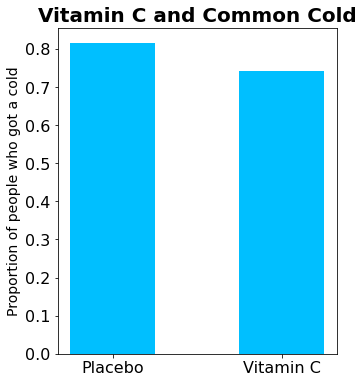

In [13]:
x_values = ['Placebo', 'Vitamin C']
y_values = df['Cold_per']

fig, axs = plt.subplots(figsize=(5,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('deepskyblue'), width=0.5) # You specify the color here     
axs.set_title("Vitamin C and Common Cold", fontsize=20, fontweight="bold")   
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Proportion of people who got a cold", fontsize=14)
axs.tick_params(labelsize=16)              
plt.show() 

Now, let's obtain the 95\% CI for proportion difference:

In [14]:
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [15]:
df

Treatment  Cold  NoCold  Total  Cold_per
0   Placebo   335      76    411  0.815085
1      VitC   302     105    407  0.742015

In [16]:
CI_prop_diff(s1=335, s2=302, n1=411, n2=407)

Proportion difference is: 0.07307041613610954
95% CI is: (0.016363724481925114, 0.12977710779029397)


# Important!!!
The table won't include total. It only includes the counts without the total

In [17]:
table = df[['Cold','NoCold']]
table

Cold  NoCold
0   335      76
1   302     105

In [18]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 5.919608681186981
p: 0.014973283758288616
dof: 1
expected: [[320.05745721  90.94254279]
 [316.94254279  90.05745721]]


How do I report this?

In [44]:
# Of the 411 subjects who took the placebo pill, 82% caught colds at some time during the winter. Among the 407 who took
# vitamin C pills, however, only 74% caught colds. The data provide strong evidence that the probability of catching cold
# was smaller for those who took vitamin C, as the difference was 7.31% (95% CI = [1.64, 12.98]). This provides strong
# support to Dr. Pauling's convictions.

## Discussions:

Because the treatments were randomly assigned to the available volunteers, the difference in cold rates in these groups can safely be attributed to differences in treatments, but it is important to understand exactly what the treatments entail.